In [4]:
import pickle
import os
import copy
import numpy as np
import matplotlib

# Avoid type 3 fonts
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

itr = 100
# samples_folder = "ppo-point-embed-tanh/ppo_point_embed_tanh_2018_08_21_19_27_48_0001"
samples_folder = "ppo-point-embed-makeplots/ppo_point_embed_makeplots_2018_08_21_19_59_46_0001"
samples_folder = "sawyer-reach-embed-tanh/sawyer_reach_embed_tanh_2018_08_21_19_31_34_0001"
samples_folder = "sawyer-reach-embed-notanh/sawyer_reach_embed_notanh_2018_08_23_12_38_13_0001"
samples_folder = "sawyer-reach-embed-notanh/sawyer_reach_embed_notanh_2018_08_26_14_48_26_0001"

TASK_GOALS = [
  # (  z     x,    y)
    (0.5,  0.3, 0.15),
    (0.5, -0.3, 0.15),
    (0.5,  0.3,  0.3),
    (0.5, -0.3,  0.3),
    (0.7,  0.3, 0.15),
    (0.7, -0.3, 0.15),
    (0.7,  0.3,  0.3),
    (0.7, -0.3,  0.3),
]

samples_file = "samples_%i.pkl" % itr
data_dir = os.path.join(os.getcwd(), "../../../data/local")
with open(os.path.join(data_dir, samples_folder, samples_file), "rb") as fin:
    samples = pickle.load(fin)

ntasks = samples["tasks"][0].shape[1]
tasks = {}
for i in range(len(samples["tasks"])):
    task = np.argmax(samples["tasks"][i][0])
    if not task in tasks:
        tasks[task] = [i]
    else:
        tasks[task].append(i)
task_nums = ", ".join("%i x task %i" % (len(tasks[task]), task) for task in range(ntasks))
print('Loaded %i trajectories (%s).' % (len(samples["tasks"]), task_nums))

Loaded 171 trajectories (18 x task 0, 23 x task 1, 22 x task 2, 22 x task 3, 23 x task 4, 24 x task 5, 21 x task 6, 18 x task 7).


In [5]:
samples.keys()

dict_keys(['observations', 'actions', 'tasks', 'latents', 'trajectories', 'rewards', 'baselines', 'returns', 'valids', 'agent_infos', 'latent_infos', 'trajectory_infos', 'env_infos', 'paths', 'cpu_adv', 'cpu_deltas', 'cpu_obs', 'cpu_act', 'cpu_agent_infos'])

Tasks: 8
Latents: 3


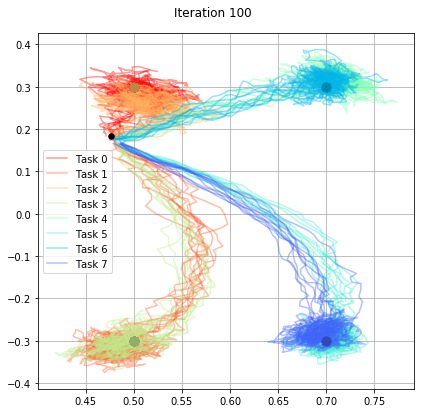

In [6]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

title = 'Iteration %i' % itr
ntasks = samples["tasks"][0].shape[1]
print("Tasks:", ntasks)
nlatents = samples["latents"][0].shape[1]
print("Latents:", nlatents)
nrollouts = 10
fig = plt.figure(figsize=(6, 6))
fig.suptitle(title)
plt.grid()

X_AXIS = 0
Y_AXIS = 1

colormap = lambda x: matplotlib.cm.get_cmap("rainbow")(1. - x)
for task in range(ntasks):    
    path_length = samples["observations"][tasks[task][0]].shape[0]
    xs = np.arange(0, path_length)
    for i in range(nrollouts):
        means = samples["env_infos"]["gripper_position"][tasks[task][i]]
        stds = np.square(np.mean(np.exp(samples["agent_infos"]["log_std"][tasks[task][i]]), axis=1)) * 10.
    
        xs, ys = means[:,X_AXIS], means[:,Y_AXIS]
        
#         plt.scatter(xs, ys, s=stds, color=colormap(task * 1. / ntasks), zorder=1, alpha=.1)
        plt.plot(xs, ys, color=colormap(task * 1. / ntasks), zorder=2, label="Task %i" % task if i == 0 else None, alpha=.4)
        if task == 0 and i == 0:
            plt.scatter([xs[X_AXIS]], [ys[Y_AXIS]], s=30, color="black", zorder=3)
        true_color = np.array(colormap(task * 1. / ntasks)) * 0.75
        true_color[3] = 1.
        plt.scatter([TASK_GOALS[task][X_AXIS]], [TASK_GOALS[task][Y_AXIS]], s=70, color=true_color, zorder=3)
plt.legend()
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
# fig.savefig("inference_net_%i.png" % itr)

Iteration 100
Tasks: 8
Latents: 3


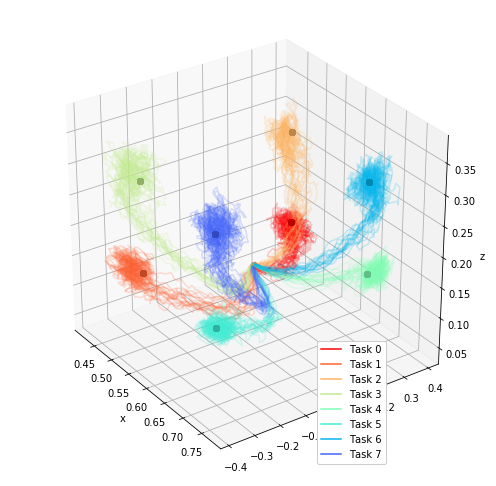

In [7]:
%matplotlib inline
from mpl_toolkits import mplot3d

title = 'Iteration %i' % itr
print(title)
ntasks = samples["tasks"][0].shape[1]
print("Tasks:", ntasks)
nlatents = samples["latents"][0].shape[1]
print("Latents:", nlatents)
nrollouts = 18
fig = plt.figure(figsize=(7, 7))
# fig.suptitle(title)
ax = fig.add_subplot(111, projection='3d')
ax.grid()

colormap = lambda x: matplotlib.cm.get_cmap("rainbow")(1. - x)
for task in range(ntasks):    
    path_length = samples["observations"][tasks[task][0]].shape[0]
    xs = np.arange(0, path_length)
    for i in range(nrollouts):
        means = samples["env_infos"]["gripper_position"][tasks[task][i]]
        stds = np.square(np.mean(np.exp(samples["agent_infos"]["log_std"][tasks[task][i]]), axis=1)) * 10.
    
        xs, ys, zs = means[:,0], means[:,1], means[:,2]
        
#         ax.scatter(xs, ys, zs, s=stds, color=colormap(task * 1. / ntasks), zorder=1, alpha=.1)
        ax.plot(xs, ys, zs, color=colormap(task * 1. / ntasks), zorder=2,
                label="Task %i" % task if i == 0 else None, alpha=.2)
        if task == 0 and i == 0:
            ax.scatter([xs[0]], [ys[0]], [zs[0]], s=30, color="black", zorder=3)
        true_color = np.array(colormap(task * 1. / ntasks)) * 0.75
        true_color[3] = 1.
        ax.scatter([TASK_GOALS[task][0]], [TASK_GOALS[task][1]], [TASK_GOALS[task][2]], s=30, color=true_color, zorder=3)

ax.view_init(elev=30, azim=-35)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
legend = plt.legend(bbox_to_anchor=(.8, .3))
for lh in legend.legendHandles: 
    lh.set_alpha(1)
legend.get_frame().set_alpha(1)
fig.tight_layout()
fig.savefig("gripper_pos_%i.png" % itr, dpi=600)

Tasks: 8
Latents: 3


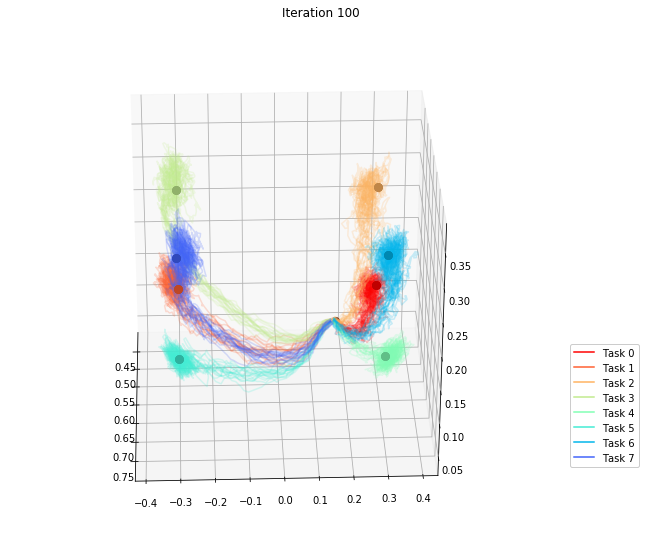

In [8]:
%matplotlib inline
from mpl_toolkits import mplot3d
import matplotlib.animation as animation

title = 'Iteration %i' % itr
ntasks = samples["tasks"][0].shape[1]
print("Tasks:", ntasks)
nlatents = samples["latents"][0].shape[1]
print("Latents:", nlatents)
nrollouts = 18
fig = plt.figure(figsize=(8 + 1, 8))
fig.suptitle(title)
ax = fig.add_subplot(111, projection='3d')
ax.grid()

colormap = lambda x: matplotlib.cm.get_cmap("rainbow")(1. - x)
for task in range(ntasks):    
    path_length = samples["observations"][tasks[task][0]].shape[0]
    xs = np.arange(0, path_length)
    for i in range(nrollouts):
        means = samples["env_infos"]["gripper_position"][tasks[task][i]]
        stds = np.square(np.mean(np.exp(samples["agent_infos"]["log_std"][tasks[task][i]]), axis=1)) * 10.
    
        xs, ys, zs = means[:,0], means[:,1], means[:,2]
        
#         ax.scatter(xs, ys, zs, s=stds, color=colormap(task * 1. / ntasks), zorder=1, alpha=.1)
        ax.plot(xs, ys, zs, color=colormap(task * 1. / ntasks), zorder=2,
                label="Task %i" % task if i == 0 else None, alpha=.2)
        if task == 0 and i == 0:
            ax.scatter([xs[0]], [ys[0]], [zs[0]], s=30, color="black", zorder=3)
        true_color = np.array(colormap(task * 1. / ntasks)) * 0.75
        true_color[3] = 1.
        ax.scatter([TASK_GOALS[task][0]], [TASK_GOALS[task][1]], [TASK_GOALS[task][2]], s=50, color=true_color, zorder=3)

legend = plt.legend(bbox_to_anchor=(1.2, .4))
for lh in legend.legendHandles: 
    lh.set_alpha(1)
legend.get_frame().set_alpha(1)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

def update(num, *_args):
    ax.view_init(elev=30, azim=num*2)
    return _args
ani = animation.FuncAnimation(fig, update, 180,
                              interval=50, blit=True)
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
ani.save('gripper_pos_%i.mp4' % itr, writer=writer)
ani